In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread # for importing tiff images
import pydicom as dicom # for handling dicom files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.

/kaggle/input/siim-medical-images/full_archive.npz
/kaggle/input/siim-medical-images/overview.csv
/kaggle/input/siim-medical-images/dicom_dir/ID_0059_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0011_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0085_AGE_0067_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0084_AGE_0067_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0079_AGE_0071_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0035_AGE_0059_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0041_AGE_0045_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0036_AGE_0074_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0081_AGE_0058_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0068_AGE_0072_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0007_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images

Anyways, let's read in the file and take a look at some of the variables.

In [2]:
images = pd.read_csv('/kaggle/input/siim-medical-images/overview.csv')
images.head(10)
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Unnamed: 0        100 non-null int64
Age               100 non-null int64
Contrast          100 non-null bool
ContrastTag       98 non-null object
raw_input_path    100 non-null object
id                100 non-null int64
tiff_name         100 non-null object
dicom_name        100 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 5.7+ KB


From here, we'll import the images and stack them into a numpy array.

In [3]:
images["tiff_path"] = '/kaggle/input/siim-medical-images/tiff_images/' + images["tiff_name"]
images["dicom_path"] = '/kaggle/input/siim-medical-images/dicom_dir/' + images["dicom_name"]

The first step to preprocess the data is to take all of the images, and stack them into one numpy array.

In [4]:
tiff_images = []

for path in images["tiff_path"]:
    im = imread(path)
    tiff_images.append(im)
        
tiff_images = np.array(tiff_images, dtype = 'float64')
print(tiff_images.shape)

(100, 512, 512)


Let's go ahead and take a look at the images with their respective ages, ids and Contrasts.

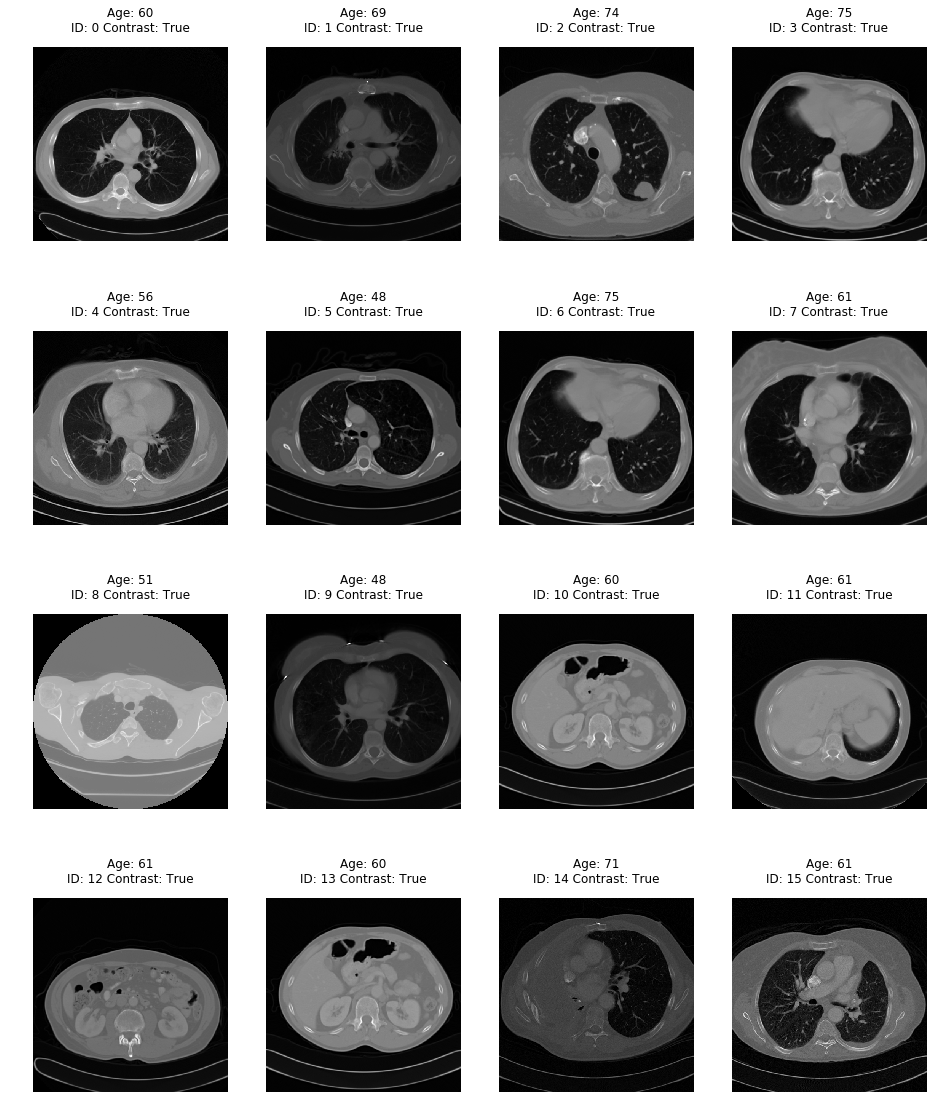

In [5]:
fig, ax = plt.subplots(4,4, figsize = (16,20))
for i,im in enumerate(tiff_images[:16]):
    ax[i//4, i%4].matshow(im, cmap = 'gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title('Age: {}\nID: {} Contrast: {}'.format(images.loc[i, 'Age'], images.loc[i, 'id'], images.loc[i, 'Contrast']))
plt.show()

Here, we'll take the DICOM image data and out it into a numpy array.

In [6]:
dicom_images = []

for path in images["dicom_path"]:
    im = dicom.read_file(path)
    dicom_images.append(im.pixel_array)
        
dicom_images = np.array(dicom_images, dtype = 'float64')

Let's go ahead and take a look at the images with their respective ages, ids and Contrasts.

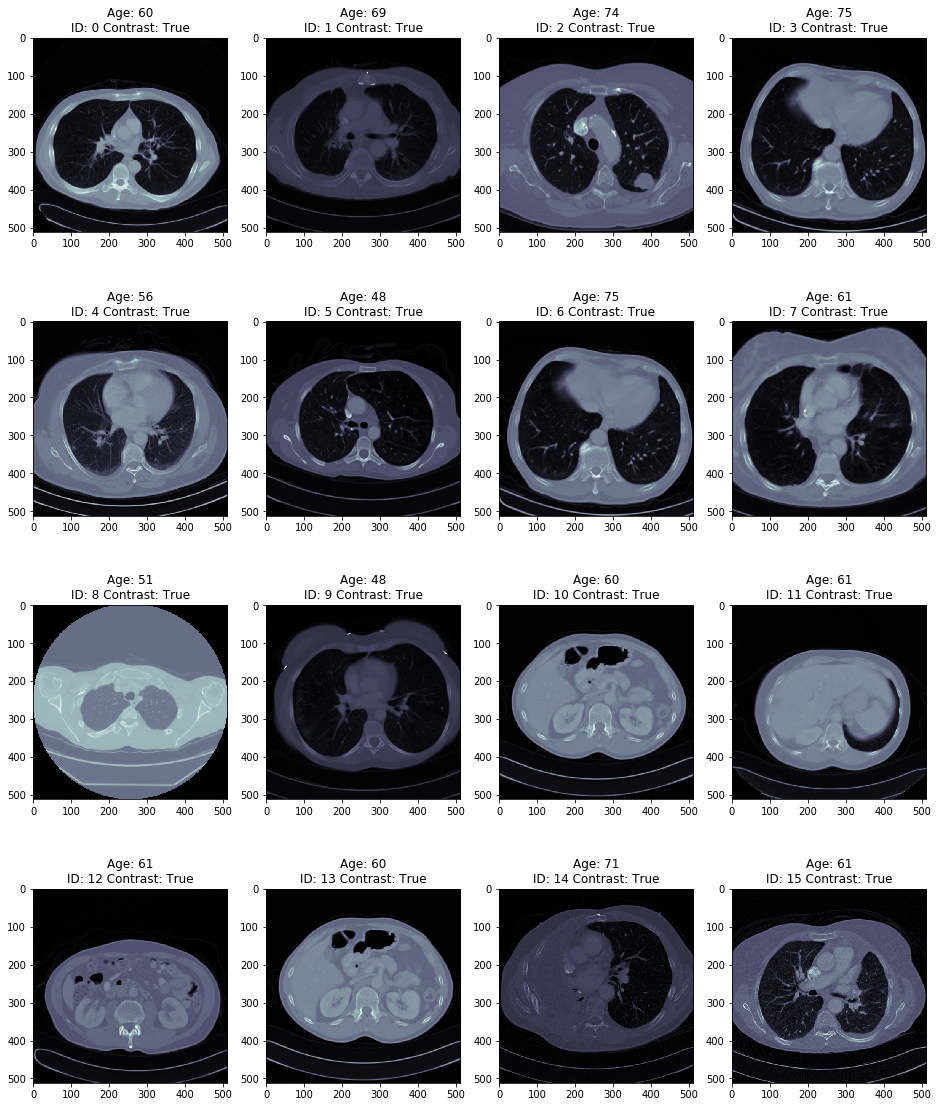

In [7]:
fig, ax = plt.subplots(4,4, figsize = (16,20))
for i,im in enumerate(dicom_images[:16]):
    ax[i//4, i%4].imshow(im, cmap = plt.cm.bone)
    ax[i//4, i%4].set_title('Age: {}\nID: {} Contrast: {}'.format(images.loc[i, 'Age'], images.loc[i, 'id'], images.loc[i, 'Contrast']))
plt.show()